# 1. Tensorflow v2.x에서 v1버전 사용하기

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#경고는 나오지만 그냥 실행합시다.
#버전 2를 비활성화했으니 1로 사용 가능해졌다!


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#tensor = data, 연산. 데이터는 상수일수도, 변수일수도 있다.
# node1 상수 tensor 선언
node1=tf.constant("Hello,Tensorflow")
#graph(computational graph를 생성)
sess=tf.Session()
#print(nodel)
print(sess.run(node1)) # b가 의미하는 것은 byte literals
# http://stackoverflow.com/questions/6269765
print(sess.run(node1).decode())

b'Hello,Tensorflow'
Hello,Tensorflow


In [4]:
# 간단한 수학 연산 수행(computational graph)
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
# node3 = node1 + node2
node3 = tf.add(node1, node2)
# computational graph 실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


# tensorflow
- 그래프 정의
- tf.Session()을 실행
- sess.run()을 통해 값을 확인할 수 있음.

In [5]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [6]:
data = [1.,2.,3.,4.]
m = tf.reduce_mean(data) # reduce_mean 평균값 연산
sess = tf.Session()
print(sess.run(m))

2.5


#  v1을 이용한 linear regression을 구현

## 2.1 독립변수 x가 한개

In [7]:
# tensor graph 정의

# train data set
# x = np.array([1,2,3])
# y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적은 cost함수가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (tensorflow v2. fit()함수)
'''
for step in range(1, 6001):
    sess.run(train)
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step, 
                        sess.run(cost), sess.run(W), sess.run(b)))
'''
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
                        cost_val, W_val, b_val))

200번째 cost:0.010188550688326359, W값:[0.8830482], b값:[0.265859]
400번째 cost:0.0038904882967472076, W값:[0.9277309], b값:[0.16428469]
600번째 cost:0.0014855748740956187, W값:[0.9553421], b값:[0.10151782]
800번째 cost:0.0005672649131156504, W값:[0.9724042], b값:[0.06273179]
1000번째 cost:0.00021660754282493144, W값:[0.98294747], b값:[0.03876433]
1200번째 cost:8.271255501313135e-05, W값:[0.98946244], b값:[0.02395406]
1400번째 cost:3.1582963856635615e-05, W값:[0.99348855], b값:[0.01480209]
1600번째 cost:1.2060066183039453e-05, W값:[0.9959763], b값:[0.00914677]
1800번째 cost:4.604971309163375e-06, W값:[0.9975136], b값:[0.00565213]
2000번째 cost:1.7584810620974167e-06, W값:[0.9984635], b값:[0.00349271]
2200번째 cost:6.716065854561748e-07, W값:[0.99905044], b값:[0.00215845]
2400번째 cost:2.565503791629453e-07, W값:[0.9994131], b값:[0.0013341]
2600번째 cost:9.8066465170632e-08, W값:[0.9996371], b값:[0.00082484]
2800번째 cost:3.752963095848827e-08, W값:[0.9997754], b값:[0.00051015]
3000번째 cost:1.4369356371446429e-08, W값:[0.9998611], b값:[0.000315

In [8]:
sess.run([W,b])

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [9]:
w_, b_ = sess.run([W,b])

In [10]:
print("최종적으로 나온 회귀식 : H={}*x + {}".format(w_[0], b_[0]))

최종적으로 나온 회귀식 : H=0.9999977350234985*x + 4.490227638598299e-06


In [11]:
# tensor graph 정의

# train data set
# x = np.array([1,2,3])
# y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(100.0, name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적은 cost함수가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())

# 4000번 학습 (tensorflow v2. fit()함수)
for step in range(1, 4001):
    W_val, b_val = sess.run([W, b])
    if step%200 == 1:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
                        cost_val, W_val, b_val[0]))
    sess.run(train)

1번째 cost:3.243232722313638e-12, W값:100.0, b값:0.9731490612030029
201번째 cost:3.243232722313638e-12, W값:10.697290420532227, b값:-22.044218063354492
401번째 cost:3.243232722313638e-12, W값:6.992336273193359, b값:-13.621989250183105
601번째 cost:3.243232722313638e-12, W값:4.702901840209961, b값:-8.417566299438477
801번째 cost:3.243232722313638e-12, W값:3.2881667613983154, b값:-5.201540470123291
1001번째 cost:3.243232722313638e-12, W값:2.4139480590820312, b값:-3.2142364978790283
1201번째 cost:3.243232722313638e-12, W값:1.8737339973449707, b값:-1.9862028360366821
1401번째 cost:3.243232722313638e-12, W값:1.5399144887924194, b값:-1.2273527383804321
1601번째 cost:3.243232722313638e-12, W값:1.3336344957351685, b값:-0.7584295272827148
1801번째 cost:3.243232722313638e-12, W값:1.2061657905578613, b값:-0.46866321563720703
2001번째 cost:3.243232722313638e-12, W값:1.127397894859314, b값:-0.28960514068603516
2201번째 cost:3.243232722313638e-12, W값:1.0787240266799927, b값:-0.17895829677581787
2401번째 cost:3.243232722313638e-12, W값:1.04864692687

## 2.1 predict를 하기 위한 placeholder 노드

In [12]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
#ab = tf.add(a+b)
ab = a + b
sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [13]:
sess.run(ab, feed_dict={a : [1,2,3],
                        b : [10,10,10]})

array([11., 12., 13.], dtype=float32)

In [14]:
sess.run(ab, feed_dict={a : np.array([1,2,3]),
                        b : np.array([10,10,10])})

array([11., 12., 13.], dtype=float32)

In [15]:
# training data set (H = 2x + 3)
x_data = [1, 2, 3]
y_data = [5, 7, 9]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
# Hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번째:cost-{}, W-{}, b-{}".format(step, 
                                                cost_val, W_val, b_val))

200번째:cost-0.36940088868141174, W-[2.704206], b-[1.3991745]
400번째:cost-0.14105521142482758, W-[2.4351566], b-[2.010787]
600번째:cost-0.053862065076828, W-[2.2689006], b-[2.3887255]
800번째:cost-0.020567193627357483, W-[2.1661646], b-[2.622269]
1000번째:cost-0.007853571325540543, W-[2.1026797], b-[2.766585]
1200번째:cost-0.002998870564624667, W-[2.0634496], b-[2.8557642]
1400번째:cost-0.0011451252503320575, W-[2.0392082], b-[2.9108706]
1600번째:cost-0.0004372670082375407, W-[2.0242286], b-[2.944923]
1800번째:cost-0.00016697606770321727, W-[2.014972], b-[2.9659653]
2000번째:cost-6.376473174896091e-05, W-[2.0092518], b-[2.9789684]
2200번째:cost-2.434770249237772e-05, W-[2.005717], b-[2.987004]
2400번째:cost-9.298728400608525e-06, W-[2.0035334], b-[2.9919684]
2600번째:cost-3.5519244647730375e-06, W-[2.0021842], b-[2.9950356]
2800번째:cost-1.358426402475743e-06, W-[2.0013504], b-[2.9969301]
3000번째:cost-5.19796856224275e-07, W-[2.0008357], b-[2.9981005]
3200번째:cost-1.9955200514232274e-07, W-[2.0005183], b-[2.998823

In [16]:
sess.run([W, b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [17]:
# 예측해보기(predict)
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [18]:
sess.run(H, feed_dict={x: np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.2 scale이 다른 데이터들의 linear regression을 구현

In [19]:

# training data set (datadml scale이 다르면 학습 결과가 ?)
x_data = [1, 2, 5, 8,10]
y_data = [5,15,68,80,95]

# placeholder를 설정
x = tf.placeholder(dtype=tf.float32, shape=None)
y = tf.placeholder(dtype=tf.float32, shape=None)
#shape:어떤게 들어올지 지정. none면 아무거나 들어올 것. 

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train     = optimizer.minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val = sess.run([train, cost, W], feed_dict={x:x_data,
                                                              y:y_data})
    if step%200 == 0 :
        print("{}번째 cost-{}, W-{}".format(step, cost_val, W_val))


200번째 cost-79.26947784423828, W-[10.071943]
400번째 cost-79.15138244628906, W-[10.133233]
600번째 cost-79.14055633544922, W-[10.151798]
800번째 cost-79.13954162597656, W-[10.157421]
1000번째 cost-79.13948059082031, W-[10.159123]
1200번째 cost-79.13945007324219, W-[10.159639]
1400번째 cost-79.13944244384766, W-[10.159796]
1600번째 cost-79.13946533203125, W-[10.159843]
1800번째 cost-79.13946533203125, W-[10.159858]
2000번째 cost-79.13945007324219, W-[10.159862]
2200번째 cost-79.13944244384766, W-[10.1598625]
2400번째 cost-79.13945770263672, W-[10.1598625]
2600번째 cost-79.13945770263672, W-[10.1598625]
2800번째 cost-79.13945770263672, W-[10.1598625]
3000번째 cost-79.13945770263672, W-[10.1598625]
3200번째 cost-79.13945770263672, W-[10.1598625]
3400번째 cost-79.13945770263672, W-[10.1598625]
3600번째 cost-79.13945770263672, W-[10.1598625]
3800번째 cost-79.13945770263672, W-[10.1598625]
4000번째 cost-79.13945770263672, W-[10.1598625]
4200번째 cost-79.13945770263672, W-[10.1598625]
4400번째 cost-79.13945770263672, W-[10.1598625]
46

In [20]:
sess.run([W,b])

[array([10.1598625], dtype=float32), array([-0.23128414], dtype=float32)]

In [21]:
#예측은 할 수 있지만 cost가 너무 커서 믿을수없어.
sess.run(H, feed_dict={x:10})

array([101.36734], dtype=float32)

In [22]:
#예측잘안되는 이유: local min에서 멈춰서.
#global min을 구하려면? 

# 3. 독립변수 x가 여러개인 linear regression
- scale이 다른 x,y값(교안 pt 28)

In [23]:
# training data set
# x_data = [[73,80,75],
#           [93,88,93],
#           [89,91,90],
#           [96,98,100],
#           [73,66,70]]
# y_data = [[152],[185],[180],[196],[142]]
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:3.106980323791504
6000번째 cost:2.192689895629883
9000번째 cost:1.814903974533081
12000번째 cost:1.5694506168365479
15000번째 cost:1.373277187347412
18000번째 cost:1.2067763805389404
21000번째 cost:1.0634634494781494
24000번째 cost:0.9396953582763672
27000번째 cost:0.8326910734176636
30000번째 cost:0.7401959896087646
33000번째 cost:0.6602194905281067
36000번째 cost:0.5911039113998413
39000번째 cost:0.5313214659690857
42000번째 cost:0.47965317964553833
45000번째 cost:0.4349750876426697
48000번째 cost:0.3963364064693451
51000번째 cost:0.3629487156867981
54000번째 cost:0.33406469225883484
57000번째 cost:0.309099406003952
60000번째 cost:0.28751641511917114


## 4. 오존량 예측 예제
- 독립변수 x가 3 => Multi-variable Linear Regression

In [24]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

In [25]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)
x_data.shape, y_data.shape

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost {}".format(step, cost_val))

3000번째 cost 529.0515747070312
6000번째 cost 471.0494079589844
9000번째 cost 464.23199462890625
12000번째 cost 463.4087829589844
15000번째 cost 463.2874755859375
18000번째 cost 463.2484436035156
21000번째 cost 463.21917724609375
24000번째 cost 463.1909484863281
27000번째 cost 463.1629638671875
30000번째 cost 463.1350402832031
33000번째 cost 463.1070556640625
36000번째 cost 463.07904052734375
39000번째 cost 463.05108642578125
42000번째 cost 463.023193359375
45000번째 cost 462.9952392578125
48000번째 cost 462.96734619140625
51000번째 cost 462.93939208984375
54000번째 cost 462.9115295410156
57000번째 cost 462.8836975097656
60000번째 cost 462.8558654785156


In [26]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [27]:
sess.run(H, feed_dict={X:np.array([[118,8,72]])})

array([[41.47469]], dtype=float32)

In [28]:

# scale 맞추는 방법 : normalization(많이 씀), standardization(표준화)
#                   X - Xmin
# normalization = ──────────────
#                  Xmax - Xmin
# 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler 이용)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
# 의 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

In [29]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정(standardization)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
data['Ozone'] = (data['Ozone']- data['Ozone'].mean())/data['Ozone'].std()
data['Solar.R'] = (data['Solar.R']- data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind']- data['Wind'].mean())/data['Wind'].std()
data['Temp'] = (data['Temp']- data['Temp'].mean())/data['Temp'].std()

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)
x_data.shape, y_data.shape

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

 3000번째 cost 3.665651321411133
 6000번째 cost 3.2864339351654053
 9000번째 cost 2.9518892765045166
12000번째 cost 2.656644582748413
15000번째 cost 2.3959689140319824
18000번째 cost 2.1657209396362305
21000번째 cost 1.9622740745544434
24000번째 cost 1.7824524641036987
27000번째 cost 1.6234549283981323
30000번째 cost 1.48283851146698
33000번째 cost 1.3584333658218384
36000번째 cost 1.2483429908752441
39000번째 cost 1.1508973836898804
42000번째 cost 1.0646220445632935
45000번째 cost 0.9882211685180664
48000번째 cost 0.9205489754676819
51000번째 cost 0.8606023192405701
54000번째 cost 0.8074817657470703
57000번째 cost 0.7604063153266907
60000번째 cost 0.7186822891235352


In [30]:
# predict 하려면 scale이 맞춰진 데이터로 predict를 하고 결과를 다시 scale조정

In [31]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('scale 조정 전 데이터 : \n', np.c_[x_data[:3], y_data[:3]])
# scale 조정(1) sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() # scale_x : x_data를 scale조정할 객체
# x_data에 대한 설정을 잡는 부분 ; x_data 3개 컬럼에 대한 max, min 설정
scale_x.fit(x_data) 
x_data = scale_x.transform(x_data) # scale 조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) # scale 조정된 y_data
print('scale 조정된 데이터 :\n', np.c_[x_data[:3], y_data[:3]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

scale 조정 전 데이터 : 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
scale 조정된 데이터 :
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
 3000번째 cost 0.7461623549461365
 6000번째 cost 0.618114173412323
 9000번째 cost 0.5143833756446838
12000번째 cost 0.4303322732448578
15000번째 cost 0.36220911145210266
18000번째 cost 0.3069766163825989
21000번째 cost 0.26217710971832275
24000번째 cost 0.2258211225271225
27000번째 cost 0.19630081951618195
30000번째 cost 0.17231197655200958
33000번째 cost 0.15280240774154663
36000번째 cost 0.13691529631614685
39000번째 cost 0.12396369129419327
42000번째 cost 0.11338749527931213
45000번째 cost 0.10473453253507614
48000번째 cost 0.09763950854539871
51000번째 cost 0.09180513024330139
54000번째 cost 0.08699236810207367
57000번째 cost 0.08300714194774628
60000번째 cost 0.07969272881746292


In [32]:
# 8. prediction
input_data = np.array([[118., 8.,72.]])

In [33]:
scale_input_data = scale_x.transform(input_data)
print('원 데이터 : ', input_data)
print('scale 조정된 데이터 :', scale_input_data)

원 데이터 :  [[118.   8.  72.]]
scale 조정된 데이터 : [[0.33944954 0.30978261 0.375     ]]


In [34]:
predict_value = sess.run(H, feed_dict={X:scale_input_data})
scale_y.inverse_transform(predict_value)

array([[67.23968]], dtype=float32)

In [35]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정 : data를 한꺼번에 scale 조정 시 prediction 힘듦
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data),
#                     columns=['Ozone','Solar.R','Wind','Temp'])

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('조정전\n', np.c_[x_data[:2], y_data[:2]])
# scale 조정 : x_data, y_data scale을 따로 따로 - prediction 가능
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정후\n', np.c_[x_data[:2], y_data[:2]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

조정전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정후
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]
 3000번째 cost 2.9512012004852295
 6000번째 cost 2.6608684062957764
 9000번째 cost 2.4042627811431885
12000번째 cost 2.1773722171783447
15000번째 cost 1.9766675233840942
18000번째 cost 1.799068570137024
21000번째 cost 1.6418483257293701
24000번째 cost 1.5026202201843262
27000번째 cost 1.3792812824249268
30000번째 cost 1.2699828147888184
33000번째 cost 1.1730953454971313
36000번째 cost 1.0871796607971191
39000번째 cost 1.010970950126648
42000번째 cost 0.9433571100234985
45000번째 cost 0.8833332657814026
48000번째 cost 0.8300508260726929
51000번째 cost 0.7827309966087341
54000번째 cost 0.7406808137893677
57000번째 cost 0.7033111453056335
60000번째 cost 0.6700924038887024


In [36]:
input_data = np.array([[118.,8.,72.]])
scaled_input_data = scale_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict={X:scaled_input_data}))

array([[25.418083]], dtype=float32)

In [37]:

sess.run([W, b])

[array([[ 0.13812561],
        [-0.5339741 ],
        [ 0.2699776 ]], dtype=float32),
 array([-0.48627904], dtype=float32)]

# 5 logistic Regression= Binary classification(P/F) 로지스틱 회귀분석. 2개 그룹

w값은  0.12925170068027214 ,b값은  -0.27210884353741516


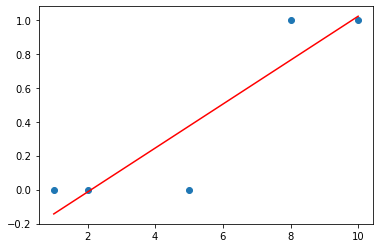

In [38]:
# logistic Regression이 필요한 이유( 기존의 linear regression으로는 안되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #회귀식 도출가능

x=np.array([1,2,5,8,10])
y=np.array([0,0,0,1,1])
lm=stats.linregress(x,y)
print('w값은 ', lm[0],',b값은 ', lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r')

w값은  0.03500583430571762 ,b값은  0.1732788798133022


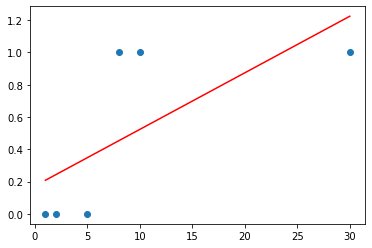

In [39]:
x=np.array([1,2,5,8,10,30])
y=np.array([0,0,0,1,1,1])
lm=stats.linregress(x,y)
print('w값은 ', lm[0],',b값은 ', lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r')

In [40]:
# 6 logistic RegressionRegression= multinomial classification(3개 이상 그룹으로 분류로 분류)

# 교안 51p부터.

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np


Instructions for updating:
non-resource variables are not supported in the long term


In [8]:

#training data set
x_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])
#placeholder
X=tf.placeholder(shape=[None,2],dtype=tf.float32)
Y=tf.placeholder(shape=[None,1],dtype=tf.float32)
#7행 2열로 잡아버리면 predict도 반드시 7,2를 넣어야하니 None으로 한다.

# Weight(2행 1열) & bias(1개)
W=tf.Variable(tf.random_normal([2,1]),name="weight")
b=tf.Variable(tf.random_normal([1]),name='bias')

# hypothesis
# Logits=X@W+b 아래 식도 이것과 같다.
logits=tf.matmul(X,W)+b
H=tf.sigmoid(logits)

# cast function
cost=tf.reduce_mean(tf.square(H-Y))
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300==0:
        print("{},{}".format(step,cost_val))

        


300,0.3093104958534241
600,0.23701895773410797
900,0.2060544341802597
1200,0.1863814741373062
1500,0.17169418931007385
1800,0.1598099172115326
2100,0.1497507095336914
2400,0.14100097119808197
2700,0.13325510919094086
3000,0.1263149082660675


In [13]:
# 학습이 잘 되었는지 확인
# Accuracy
predict = tf.cast(H>0.5,dtype=tf.float32)
correct=tf.equal(predict,Y)
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
sess.run(predict,feed_dict={X:x_data, Y:y_data})


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [15]:
print(sess.run(accuracy,feed_dict={X:x_data, Y:y_data}))

1.0


In [16]:
# 예측
print("h결과: ",sess.run(H,feed_dict={X:[[3,3]]}))
print("predict결과: ",sess.run(predict,feed_dict={X:[[3,3]]}))

h결과:  [[0.96429783]]
predict결과:  [[1.]]


# 6. multinomial classification(3개이상 그룹)
-퀴즈 1,2,3 성적과 출석에 따른 등급 붐류

In [18]:
#training data set(rydks ㅔ 54)
x_data=[[10,7,8,5],
       [8,8,9,4],
       [7,8,2,3],
       [6,3,9,3],
       [7,5,7,4],
       [3,5,6,2],
       [2,4,3,1]]
#종속변수는 multinomial classfication에서는 원핫인코딩! 
y_data = [[1,0,0],
         [1,0,0],
         [0,1,0],
         [0,1,0],
         [0,1,0],
         [0,0,1],
         [0,0,1],]

#placeholder
X=tf.placeholder(shape=[None,4],dtype=tf.float32)
Y=tf.placeholder(shape=[None,3],dtype=tf.float32)
#7행 2열로 잡아버리면 predict도 반드시 7,2를 넣어야하니 None으로 한다.

# Weight(4행 3열) & bias(3개)
W=tf.Variable(tf.random_normal([4,3]),name="weight")
b=tf.Variable(tf.random_normal([3]),name='bias')

# hypothesis
# Logits=X@W+b 
logits=tf.matmul(X,W)+b
#H=tf.nn.sigmoid(logits) 이렇게 했을때 깔끔하게 떨어지지 않는 것이 생겨서 softmax를 사용한다.
#즉, 분류분석 최종단계에서 결과의 합이 1이 되도록 한다.
H=tf.nn.softmax(logits) 



# cast function
cost=tf.reduce_mean(tf.square(H-Y))
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300==0:
        print("{},{}".format(step,cost_val))

300,1.171482801437378
600,0.9479263424873352
900,0.6730166077613831
1200,0.5540671944618225
1500,0.5014704465866089
1800,0.44643259048461914
2100,0.050498269498348236
2400,0.045994509011507034
2700,0.042675238102674484
3000,0.0399901382625103
3300,0.037721388041973114
3600,0.03575257584452629
3900,0.034012939780950546
4200,0.032455869019031525
4500,0.03104877471923828
4800,0.029767658561468124
5100,0.028594186529517174
5400,0.02751391939818859
5700,0.02651527337729931
6000,0.02558857575058937


In [24]:
# 예측
result=sess.run(H,feed_dict={X:[[8,8,9,4]]})
print(result)
print(result.argmax(axis=1)) #0번째 열만 1

[[0.9777385  0.01957264 0.00268883]]
[0]


In [30]:
##accuracy 측정
# H= 0.97 0.19 0.002 일 경우 H.argmax = 0
# Y= 1   0    0     일 경우 Y.argmax=0
predict = tf.argmax(H,axis=1) # 어떤 열의 값이 제일 큰지 index 반환
correct = tf.equal(predict,tf.argmax(Y,1)) 
#print(sess.run(correct,feed_dict={X:x_data,Y:y_data}))
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:x_data,Y:y_data})*100,'%')

100.0 %


# XOR 교안 77


In [38]:
#training data set
x_data=[[0,0],
       [0,1],
       [1,0],
       [1,1]]
y_data=[[0],[1],[1],[0]]
#placeholder
X=tf.placeholder(shape=[None,2],dtype=tf.float32)
Y=tf.placeholder(shape=[None,1],dtype=tf.float32)
# Weight & bias 
W=tf.Variable(tf.random_normal([2,1]),name="weight")
b=tf.Variable(tf.random_normal([1]),name='bias')

# hypothesis
# Logits=X@W+b 
logits=tf.matmul(X,W)+b
#다중분류아니고 이중분류이므로 sigmoid
H=tf.sigmoid(logits) 

# cast function
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300==0:
        print("{},{}".format(step,cost_val))

# predict
predict = tf.cast(H>0.5,dtype=tf.float32)
correct=tf.equal(predict,Y) #F,T,F,T
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('정확도:',sess.run(accuracy, feed_dict={X:x_data,Y:y_data}))

300,0.693179726600647
600,0.6931487917900085
900,0.6931473016738892
1200,0.6931472420692444
1500,0.6931471824645996
1800,0.6931472420692444
2100,0.6931471824645996
2400,0.6931471824645996
2700,0.6931471824645996
3000,0.6931471824645996
정확도: 0.25


In [34]:
# predict
predict = tf.cast(H>0.5,dtype=tf.float32)
correct=tf.equal(predict,Y) #F,T,F,T
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print(sess.run(H,feed_dict={X:[[0,0]]}))

[[0.50000215]]


# Deep learning XOR 예제

In [47]:
#training data set
x_data=[[0,0],
       [0,1],
       [1,0],
       [1,1]]
y_data=[[0],[1],[1],[0]]
#placeholder
X=tf.placeholder(shape=[None,2],dtype=tf.float32)
Y=tf.placeholder(shape=[None,1],dtype=tf.float32)

# 레이어 추가


# Weight & bias (layer1 = 입력 2개 출력 10개) #바이어스는 출력 수를 따름
W1=tf.Variable(tf.random_normal([2,10]),name="weight1")
b1=tf.Variable(tf.random_normal([10]),name='bias1') 
layer1=tf.nn.relu(tf.matmul(X,W1)+b1)

# Weight & bias (layer2 = 입력 10개 출력 20개) #바이어스는 출력 수를 따름
W2=tf.Variable(tf.random_normal([10,20]),name="weight2")
b2=tf.Variable(tf.random_normal([20]),name='bias2') 
layer2=tf.nn.relu(tf.matmul(layer1,W2)+b2)

# Weight & bias (layer3 = 입력 20개 출력 10개) #바이어스는 출력 수를 따름
W3=tf.Variable(tf.random_normal([20,10]),name="weight3")
b3=tf.Variable(tf.random_normal([10]),name='bias4') 
layer3=tf.nn.relu(tf.matmul(layer2,W3)+b3)

# Weight & bias (layer4 (아웃풋 레이어)= 입력 10개 출력 1개) #바이어스는 출력 수를 따름
W4=tf.Variable(tf.random_normal([10,1]),name="weight2")
b4=tf.Variable(tf.random_normal([1]),name='bias2') 

#은닉층은 relu 넣는것이 일반적


# hypothesis
# Logits=X@W+b 
logits=tf.matmul(layer3,W4)+b4
#다중분류아니고 이중분류이므로 sigmoid
H=tf.sigmoid(logits) 

# cast function
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300==0:
        print("몇회째: {}, 코스트:{}".format(step,cost_val))

# predict
predict = tf.cast(H>0.5,dtype=tf.float32)
correct=tf.equal(predict,Y) #F,T,F,T
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('정확도:',sess.run(accuracy, feed_dict={X:x_data,Y:y_data}))

몇회째: 300, 코스트:0.0014476418728008866
몇회째: 600, 코스트:0.0006298384978435934
몇회째: 900, 코스트:0.0003887788625434041
몇회째: 1200, 코스트:0.00027688179397955537
몇회째: 1500, 코스트:0.000213260151213035
몇회째: 1800, 코스트:0.0001729787909425795
몇회째: 2100, 코스트:0.0001450979762012139
몇회째: 2400, 코스트:0.00012458348646759987
몇회째: 2700, 코스트:0.00010897005995502695
몇회째: 3000, 코스트:9.653124288888648e-05
정확도: 1.0


In [ ]:
,  